In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import random

In [48]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
image = X.to_numpy()

In [9]:
knn = KNeighborsClassifier(n_neighbors=6,weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [37]:
def show_image(idx):
    plt.imshow((image[idx].reshape(28,28)), 'gray')
    plt.title("The Number on the image is: {}".format(y[idx]))

In [11]:
y_pred = knn.predict(X_test)


Predictions: 8, Actual Values: 8
Accuracy : 0.9702380952380952


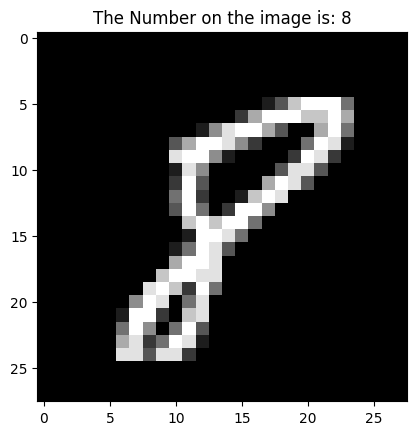

In [74]:
idx = random.randint(0, len(X_test) + 1)
print("Predictions: {}, Actual Values: {}".format(y_pred[idx], y_test.iloc[idx]))
show_image(y_test.index[idx])
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))